In [1]:
import numpy as np
from matplotlib import pyplot
from PySDM.physics import in_unit, si
from open_atmos_jupyter_utils import show_plot
from PySDM_examples.seeding import Settings, Simulation

In [2]:
settings = Settings()
simulation = Simulation(settings)

In [3]:
output = simulation.run()

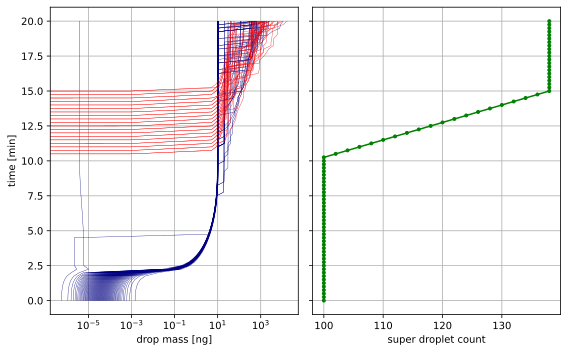

HTML(value="<a href='./hello_world.pdf' target='_blank'>./hello_world.pdf</a><br>")

In [4]:
time = output['products']['time']
water_mass = output['attributes']['water mass']

fig, axs = pyplot.subplot_mosaic(
    [['a', 'b']],
    sharey=True,
    figsize=(8, 5),
    tight_layout=True
)

for drop_id in range(water_mass.shape[1]):
    axs['a'].plot(
        in_unit(water_mass[:, drop_id], si.ng),
        in_unit(time, si.min),
        color="navy" if water_mass[0, drop_id] != 0 else "red",
        linewidth=0.333,
    )
axs['a'].set_ylabel("time [min]")
axs['a'].set_xlabel("drop mass [ng]")
axs['a'].grid()
axs['a'].set_xscale("log")

axs['b'].plot(
    output['products']['sd_count'],
    in_unit(time, si.min),
    marker='.',
    color='green',
)
axs['b'].set_xlabel("super droplet count")
axs['b'].grid()

show_plot('hello_world.pdf')